In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/parandeung/BCWoo/main/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [5]:
df['y'] = 0
df.loc[df['Response']=='Yes', 'y']=1
df.head(2)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,y
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0


In [6]:
df_1 = df.select_dtypes(include=['int64','float'])
df_1.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'y'],
      dtype='object')

In [7]:
categorical_df = df.select_dtypes(include='object')
df_c = categorical_df.drop(['Customer','Effective To Date'], axis = 1)

In [8]:
for i in ['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']:
       df_c[i] = df[i].astype('category')

In [9]:
cols = ['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

In [10]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for i in df_c[cols]:
    df_c[i] = lb.fit_transform(df_c[i])
df_c.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,4,No,0,0,1,0,1,1,0,2,0,0,5,1
1,0,No,1,0,4,0,1,2,1,5,2,0,0,1
2,2,No,2,0,1,0,1,1,1,5,0,0,5,1
3,1,No,0,0,4,1,1,1,0,1,0,2,3,1
4,4,No,0,0,1,1,0,2,1,3,0,0,0,1


In [11]:
df_all = pd.concat([df_1,df_c], axis = 1)
df_all.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,y,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,2763.519279,56274,69,32,5,0,1,384.811147,0,4,No,0,0,1,0,1,1,0,2,0,0,5,1
1,6979.535903,0,94,13,42,0,8,1131.464935,0,0,No,1,0,4,0,1,2,1,5,2,0,0,1
2,12887.431650,48767,108,18,38,0,2,566.472247,0,2,No,2,0,1,0,1,1,1,5,0,0,5,1
3,7645.861827,0,106,18,65,0,7,529.881344,0,1,No,0,0,4,1,1,1,0,1,0,2,3,1
4,2813.692575,43836,73,12,44,0,1,138.130879,0,4,No,0,0,1,1,0,2,1,3,0,0,0,1


In [12]:
df_all.describe().round(2)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,y,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00
mean,8004.94,37657.38,93.22,15.10,48.06,0.38,2.97,434.09,0.14,1.74,0.48,1.55,1.83,0.49,0.98,1.12,0.83,3.80,0.97,1.10,1.89,1.09
std,6870.97,30379.90,34.41,10.07,27.91,0.91,2.39,290.50,0.35,1.29,0.66,1.38,1.35,0.50,0.61,0.64,0.48,1.61,1.01,1.07,2.07,0.54
min,1898.01,0.00,61.00,0.00,0.00,0.00,1.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3994.25,0.00,68.00,6.00,24.00,0.00,1.00,272.26,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,3.00,0.00,0.00,0.00,1.00
50%,5780.18,33889.50,83.00,14.00,48.00,0.00,2.00,383.95,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,4.00,1.00,1.00,0.00,1.00
75%,8962.17,62320.00,109.00,23.00,71.00,0.00,4.00,547.51,0.00,3.00,1.00,3.00,4.00,1.00,1.00,2.00,1.00,5.00,2.00,2.00,4.00,1.00
max,83325.38,99981.00,298.00,35.00,99.00,5.00,9.00,2893.24,1.00,4.00,2.00,4.00,4.00,1.00,2.00,2.00,2.00,8.00,3.00,3.00,5.00,2.00


In [13]:
x_vars = df_all.drop(['Response','y'], axis = 1)
y_vars = df_all['y']

In [14]:
from sklearn.preprocessing import StandardScaler
x_vars_stdscle = StandardScaler().fit_transform(x_vars.values)

In [15]:
df_scaled= pd.DataFrame(x_vars_stdscle, index = x_vars.index, columns=x_vars.columns)
df_scaled.head(2)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.169640,1.753720,-0.732899,-1.124597,-0.612669,-0.980269,0.034524,-0.188771,-1.735273,-1.119497,-0.962979,-1.031138,1.499181,-0.166682
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.400737,-1.352592,0.791999,-1.124597,1.613313,-0.980269,0.034524,1.381572,0.365732,0.748626,1.022092,-1.031138,-0.912924,-0.166682


In [18]:
df_scaled_with_y = pd.concat([y_vars,df_scaled], axis = 1)
df_scaled_with_y.head()

,y,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.169640,1.753720,-0.732899,-1.124597,-0.612669,-0.980269,0.034524,-0.188771,-1.735273,-1.119497,-0.962979,-1.031138,1.499181,-0.166682
1,0,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.400737,-1.352592,0.791999,-1.124597,1.613313,-0.980269,0.034524,1.381572,0.365732,0.748626,1.022092,-1.031138,-0.912924,-0.166682
2,0,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.455734,0.200564,2.316897,-1.124597,-0.612669,-0.980269,0.034524,-0.188771,0.365732,0.748626,-0.962979,-1.031138,1.499181,-0.166682
3,0,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,0.329769,-0.576014,-0.732899,-1.124597,1.613313,1.020128,0.034524,-0.188771,-1.735273,-1.742204,-0.962979,0.839080,0.534339,-0.166682
4,0,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,-1.018843,1.753720,-0.732899,-1.124597,-0.612669,1.020128,-1.616461,1.381572,0.365732,-0.496789,-0.962979,-1.031138,-0.912924,-0.166682


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


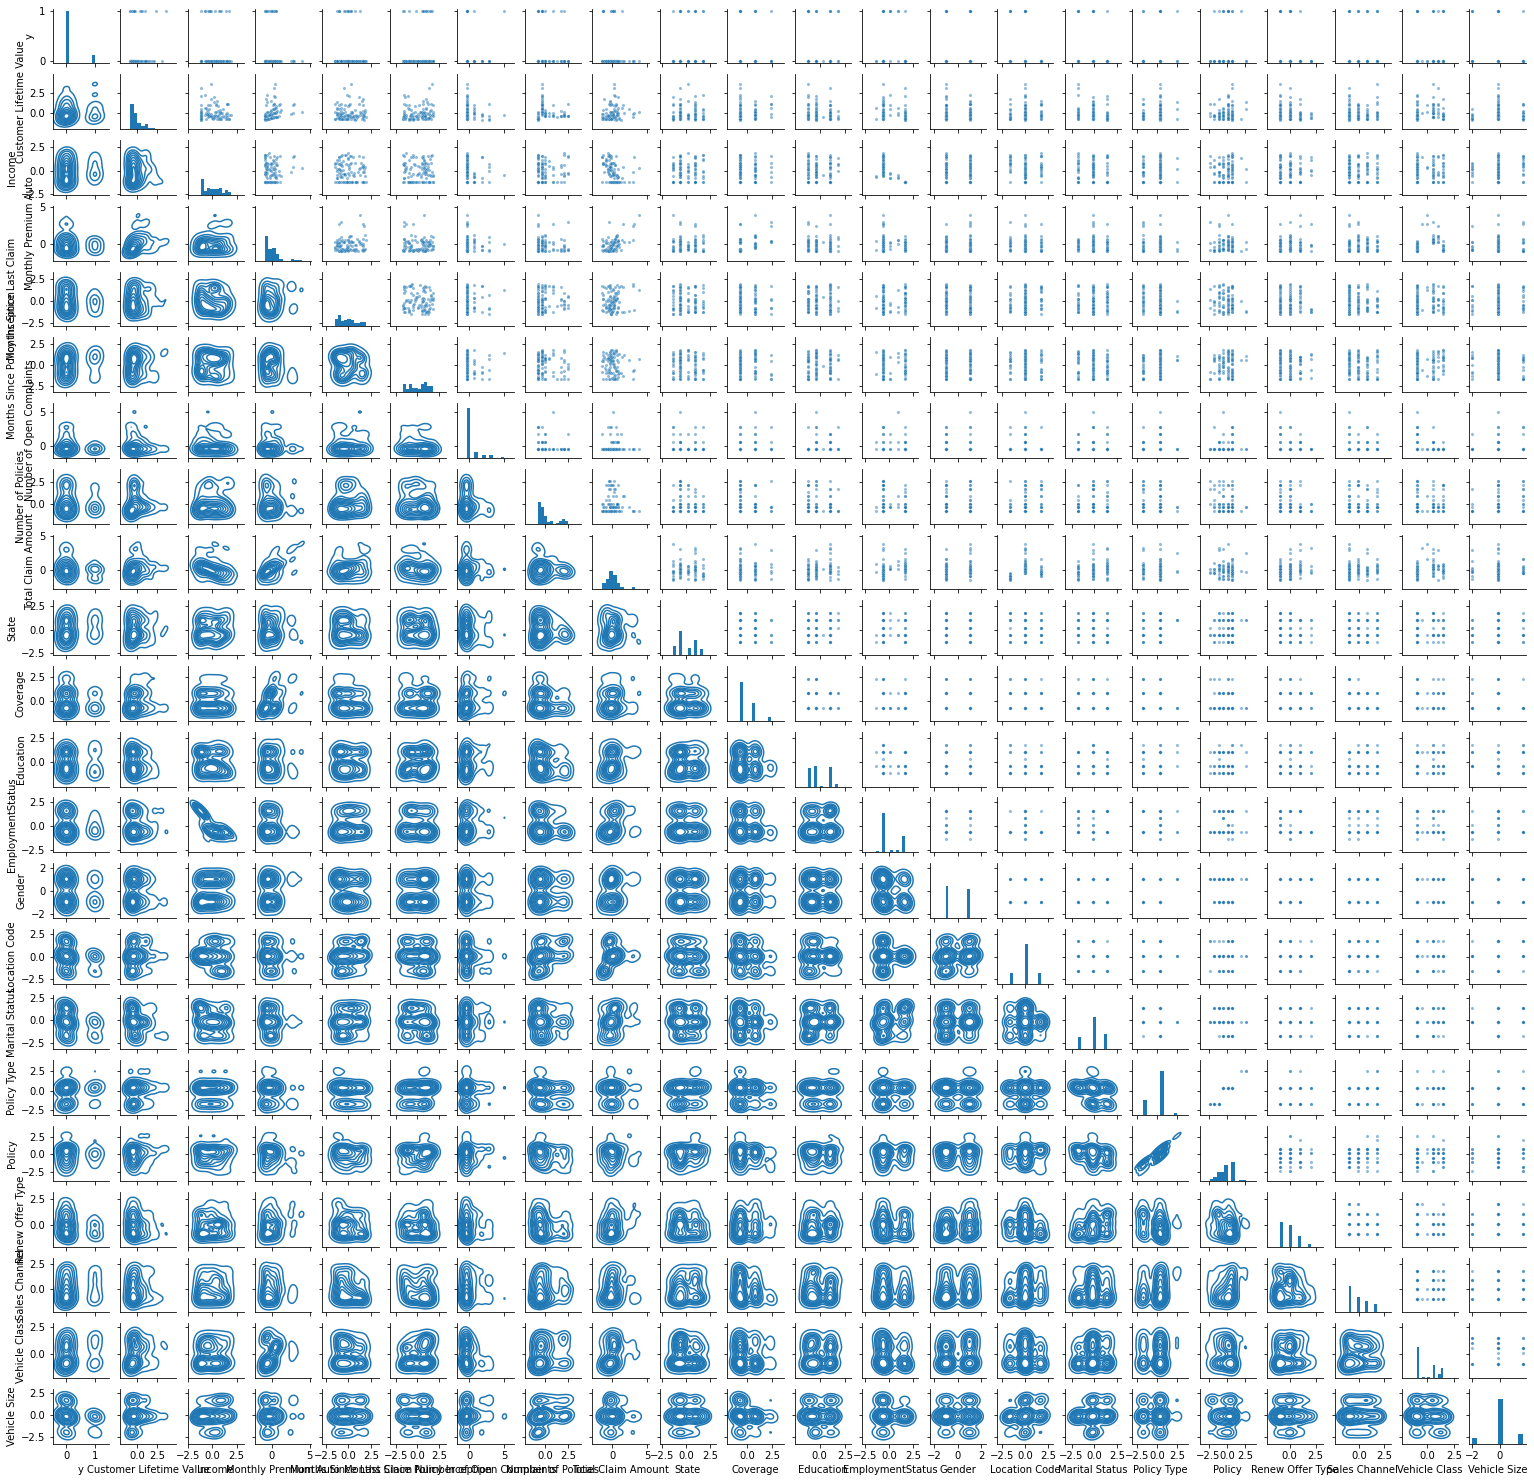

In [29]:
g = sns.PairGrid(df_scaled_with_y.sample(100, random_state=5), height=1.2, aspect=1.0)
g.map_upper(sns.scatterplot, linewidths=1, edgecolor="w", s=10, alpha=0.5)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot)

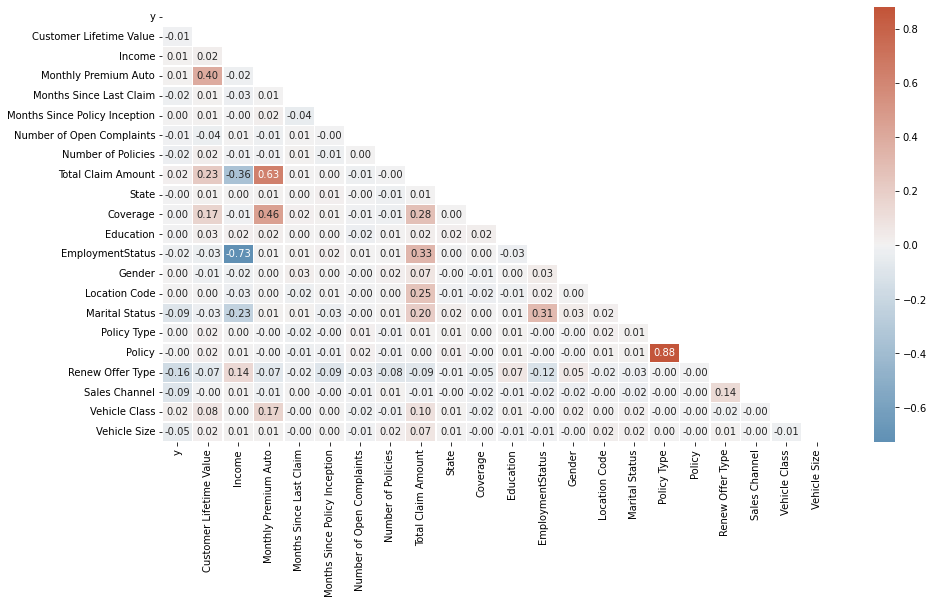

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
df_corr=df_scaled_with_y.corr()
plt.figure(figsize = (15,8))
sns.heatmap(df_corr, annot=True, fmt=".2f",
            mask=np.triu(np.ones_like(df_corr, dtype=bool)),
            cbar=True, cmap=sns.diverging_palette(240, 20, as_cmap=True),
            center=0, linewidths=0.5)

In [20]:
df_corr['y'].abs().sort_values(ascending=False)

y                                1.000000
Renew Offer Type                 0.162882
Marital Status                   0.094843
Sales Channel                    0.086607
Vehicle Size                     0.050691
Vehicle Class                    0.021225
Number of Policies               0.020891
Total Claim Amount               0.016877
EmploymentStatus                 0.016703
Months Since Last Claim          0.016597
Income                           0.011932
Monthly Premium Auto             0.010966
Number of Open Complaints        0.009881
Customer Lifetime Value          0.008930
Gender                           0.004396
Months Since Policy Inception    0.002952
State                            0.002473
Location Code                    0.001729
Policy                           0.001461
Policy Type                      0.001110
Coverage                         0.000642
Education                        0.000285
Name: y, dtype: float64

In [23]:
import statsmodels.api as sm
lr = sm.Logit(df_scaled_with_y.y, df_scaled_with_y.drop(['y'], axis = 1))
lr.fit().summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.681150
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9113
Method:                           MLE   Df Model:                           20
Date:                Sun, 06 Feb 2022   Pseudo R-squ.:                 -0.6584
Time:                        01:13:23   Log-Likelihood:                -6221.6
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value          -0.0374      0.023     -1.612      0.107      -0.083       0.008
Income                            0.0456      0.032      1.430      0.153      -0.017       0.108
Monthly Premium Auto             -0.0481      0.034     -1.421      0.155      -0.114       0.018
Months Since Last Claim          -0.0261      0.021     -1.229      0.219      -0.068       0.016
Months Since Policy Inception    -0.0227      0.021     -1.063      0.288      -0.064       0.019
Number of Open Complaints        -0.0233      0.021     -1.096      0.273      -0.065       0.018
Number of Policies               -0.0443      0.021     -2.081      0.037      -0.086      -0.003
Total Claim Amount                0.1022      0.034      3.017      0.003       0.036       0.169
State                            -0.0027      0.021     -0.126      0.899      -0.044       0.039
Coverage                         -0.0129      0.024     -0.538      0.591      -0.060       0.034
Education                         0.0151      0.021      0.710      0.477      -0.027       0.057
EmploymentStatus                 -0.0085      0.032     -0.267      0.789      -0.071       0.054
Gender                            0.0139      0.021      0.652      0.514      -0.028       0.056
Location Code                    -0.0243      0.023     -1.070      0.285      -0.069       0.020
Marital Status                   -0.1514      0.023     -6.671      0.000      -0.196      -0.107
Policy Type                       0.0230      0.045      0.515      0.606      -0.064       0.110
Policy                           -0.0223      0.045     -0.501      0.616      -0.110       0.065
Renew Offer Type                 -0.2371      0.022    -10.697      0.000      -0.281      -0.194
Sales Channel                    -0.0947      0.021     -4.425      0.000      -0.137      -0.053
Vehicle Class                     0.0282      0.022      1.301      0.193      -0.014       0.071
Vehicle Size                     -0.0726      0.021     -3.401      0.001      -0.114      -0.031
=================================================================================================
"""

In [30]:
significant_cols = ['Customer Lifetime Value','Income','Monthly Premium Auto','Months Since Last Claim',
                    'Months Since Policy Inception','Number of Policies','Total Claim Amount','Marital Status',
                    'Renew Offer Type','Sales Channel','Vehicle Size']
lr_2 = sm.Logit(df_scaled_with_y.y, df_scaled_with_y[significant_cols])
lr_2.fit().summary()

Optimization terminated successfully.
         Current function value: 0.681474
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9123
Method:                           MLE   Df Model:                           10
Date:                Sun, 06 Feb 2022   Pseudo R-squ.:                 -0.6592
Time:                        01:26:33   Log-Likelihood:                -6224.6
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value          -0.0356      0.023     -1.539      0.124      -0.081       0.010
Income                            0.0483      0.024      2.002      0.045       0.001       0.096
Monthly Premium Auto             -0.0419      0.030     -1.380      0.168      -0.101       0.018
Months Since Last Claim          -0.0257      0.021     -1.211      0.226      -0.067       0.016
Months Since Policy Inception    -0.0226      0.021     -1.060      0.289      -0.064       0.019
Number of Policies               -0.0436      0.021     -2.053      0.040      -0.085      -0.002
Total Claim Amount                0.0909      0.031      2.916      0.004       0.030       0.152
Marital Status                   -0.1503      0.022     -6.761      0.000      -0.194      -0.107
Renew Offer Type                 -0.2333      0.022    -10.590      0.000      -0.276      -0.190
Sales Channel                    -0.0948      0.021     -4.434      0.000      -0.137      -0.053
Vehicle Size                     -0.0725      0.021     -3.398      0.001      -0.114      -0.031
=================================================================================================
"""

In [24]:
y = df_scaled_with_y.y
X = df_scaled_with_y.drop('y', axis = 1)

In [25]:
from sklearn.model_selection import train_test_split, cross_validate
X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

print(confusion_matrix(svc_pred,y_test))
print('accuracy_score:',accuracy_score(svc_pred, y_test))
print(classification_report(svc_pred, y_test))

cross_val_score_svc = cross_validate(svc, X_train, y_train,cv = 5)
print (cross_val_score_svc)
#print('Cross validation train_score',cross_val_score_svc['train_score'].mean())
print('Cross validation test_score',cross_val_score_svc['test_score'].mean())

[[2325  379]
 [   7   30]]
accuracy_score: 0.8591754834002189
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      2704
           1       0.07      0.81      0.13        37

    accuracy                           0.86      2741
   macro avg       0.54      0.84      0.53      2741
weighted avg       0.98      0.86      0.91      2741

{'fit_time': array([0.88759041, 0.92471337, 0.8851037 , 0.91242266, 1.18664074]), 'score_time': array([0.21197343, 0.20713377, 0.21764278, 0.21178436, 0.49574399]), 'test_score': array([0.87177482, 0.86708366, 0.86786552, 0.87010955, 0.86932707])}
Cross validation test_score 0.8692321245691506


In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(rfc_pred,y_test))
print('Accuracy score:',accuracy_score(rfc_pred, y_test))
print(classification_report(rfc_pred, y_test))

cross_val_score_rfc = cross_validate(rfc, X_train, y_train,cv = 5)
print (rfc_pred)
print (cross_val_score_rfc)
print('Cross validation test_score',cross_val_score_rfc['test_score'].mean())

[[2326    9]
 [   6  400]]
Accuracy score: 0.9945275446917183
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2335
           1       0.98      0.99      0.98       406

    accuracy                           0.99      2741
   macro avg       0.99      0.99      0.99      2741
weighted avg       0.99      0.99      0.99      2741

[0 0 1 ... 0 0 0]
{'fit_time': array([1.34021235, 1.07028961, 0.87065411, 0.70949721, 0.76473784]), 'score_time': array([0.17832303, 0.05300856, 0.04404402, 0.03649807, 0.03849459]), 'test_score': array([0.98983581, 0.98749023, 0.98436278, 0.99452269, 0.98356808])}
Cross validation test_score 0.987955917242662


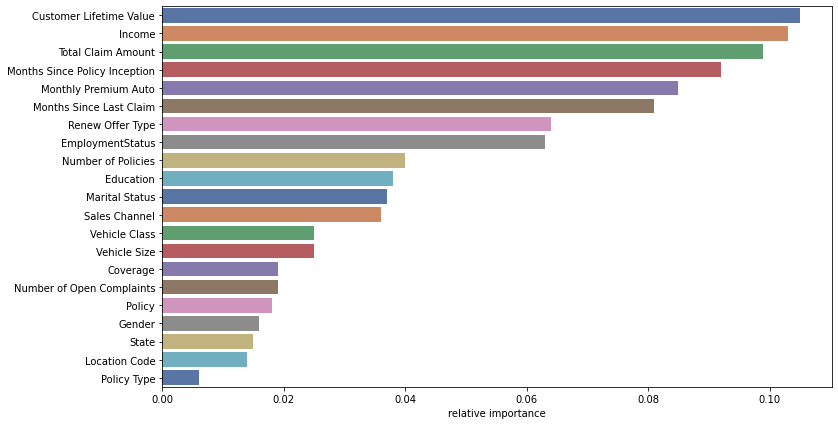

In [28]:
feature_imp = rfc.feature_importances_.round(3)
ser_rank = pd.Series(feature_imp, index=X.columns).sort_values(ascending = False)

plt.figure(figsize=(12,7))
sns.barplot(x= ser_rank.values, y = ser_rank.index, palette='deep')
plt.xlabel('relative importance')
plt.show()